# Laboratorio 1 Data Science - Series de Tiempo

##### Diego Garcia # 22404
##### Cesar Lopez # 22535


Repositorio de github: 
```
https://github.com/Czar272/Lab1_DS.git

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro, normaltest
import statsmodels.api as sm

### Convertir de xlsx a csv

In [13]:
# FileOG = "./data/Excel/Estadisticas_historicas_comercializacion.xlsx"
# importacion = pd.read_excel(FileOG, sheet_name="IMPORTACION", engine="openpyxl")
# costoImport = pd.read_excel(FileOG, sheet_name="COSTO IMPORTACION", engine="openpyxl")
# consumo = pd.read_excel(FileOG, sheet_name="CONSUMO", engine="openpyxl")
# exportacion = pd.read_excel(FileOG, sheet_name="EXPORTACION", engine="openpyxl")

# importacionCSV = "./data/CSV/importacion.csv"
# costoImportCSV = "./data/CSV/costoImport.csv"
# consumoCSV = "./data/CSV/consumo.csv"
# exportacionCSV = "./data/CSV/exportacion.csv"

# importacion.to_csv(importacionCSV, index=False)
# costoImport.to_csv(costoImportCSV, index=False)
# consumo.to_csv(consumoCSV, index=False)
# exportacion.to_csv(exportacionCSV, index=False)

In [7]:
consumo_df = pd.read_csv("./data/CSV/consumo.csv")
importacion_df = pd.read_csv("./data/CSV/importacion.csv")

columnas_deseadas = ["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

consumo_filtrado = consumo_df[columnas_deseadas]
importacion_filtrado = importacion_df[columnas_deseadas]

consumo_filtrado.to_csv("./data/CSV/consumo.csv", index=False)
importacion_filtrado.to_csv("./data/CSV/importacion.csv", index=False)

print("Archivos 'consumo.csv' e 'importacion.csv' actualizados correctamente.")


Archivos 'consumo.csv' e 'importacion.csv' actualizados correctamente.


### Descripción de los datos

__IMPORTACION__

En este conjunto se registra el volumen de productos petroleros importados de forma mensual a Guatemala desde el 2001 hasta el 2024. La unidad de medición de cada una de las variables en este conjunto es de barriles*. Para este análisis solo se tomaran en cuenta las columans de gasolina regular, gasolina super y diese de alto azufre.

*Un barril equivale a 42 galones.

In [ ]:
importacion = pd.read_csv("./data/CSV/importacion.csv")

print("\nResumen Importación:")
print(importacion.describe())


Resumen Importación:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06


<Figure size 1000x500 with 0 Axes>

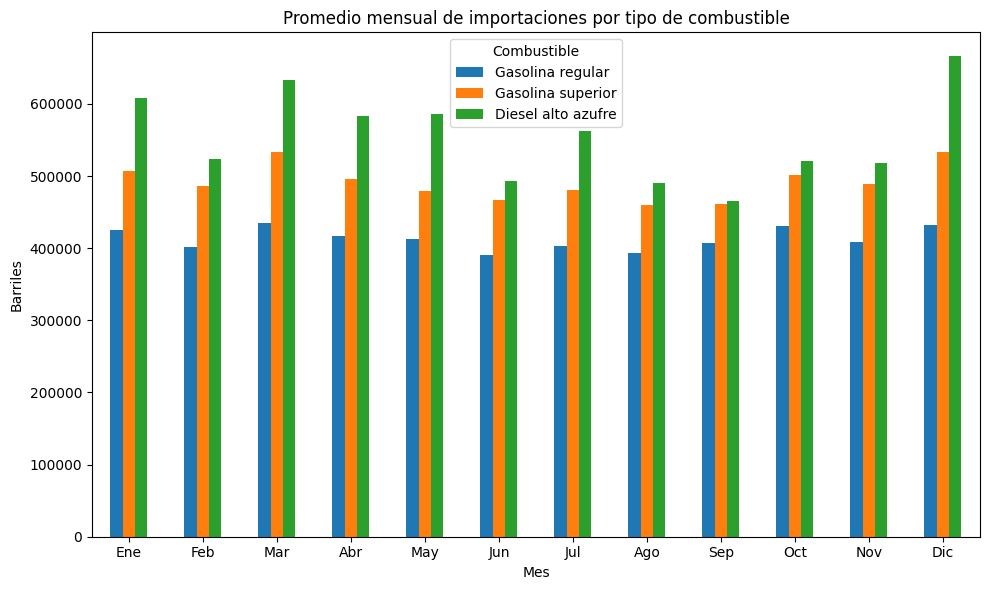

In [23]:
# Meses con más importaciones
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'])
importacion['Mes'] = importacion['Fecha'].dt.month
prom_mensual_imp = importacion.groupby('Mes')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

plt.figure(figsize=(10,5))
prom_mensual_imp.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual de importaciones por tipo de combustible')
plt.xlabel('Mes')
plt.ylabel('Barriles')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title="Combustible")
plt.tight_layout()
plt.show()

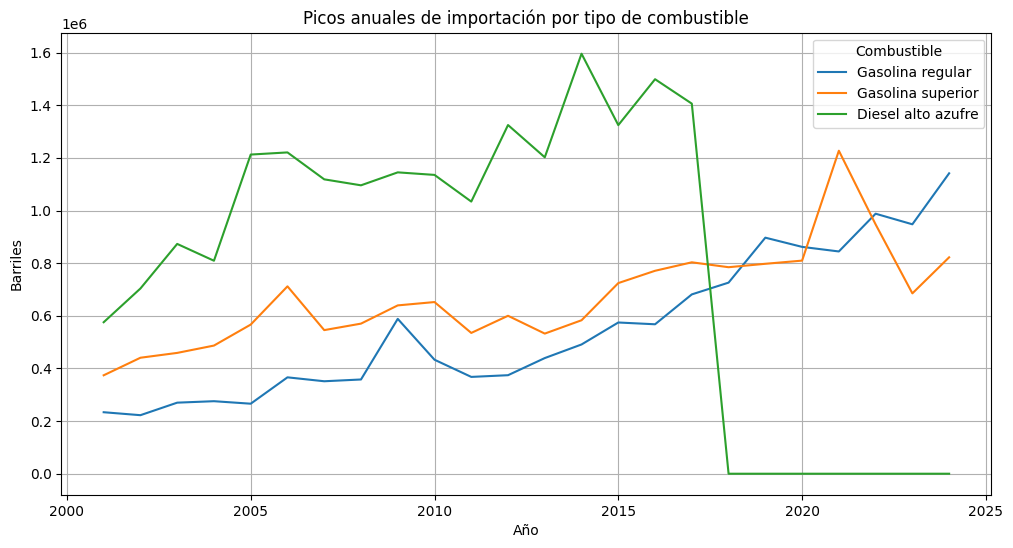

In [26]:
#Picos anuales por tipo de combustible
importacion['Año'] = importacion['Fecha'].dt.year
picos_imp = importacion.groupby('Año')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].max()

picos_imp.plot(figsize=(12,6))
plt.title('Picos anuales de importación por tipo de combustible')
plt.ylabel('Barriles')
plt.xlabel('Año')
plt.grid(True)
plt.legend(title="Combustible")
plt.show()

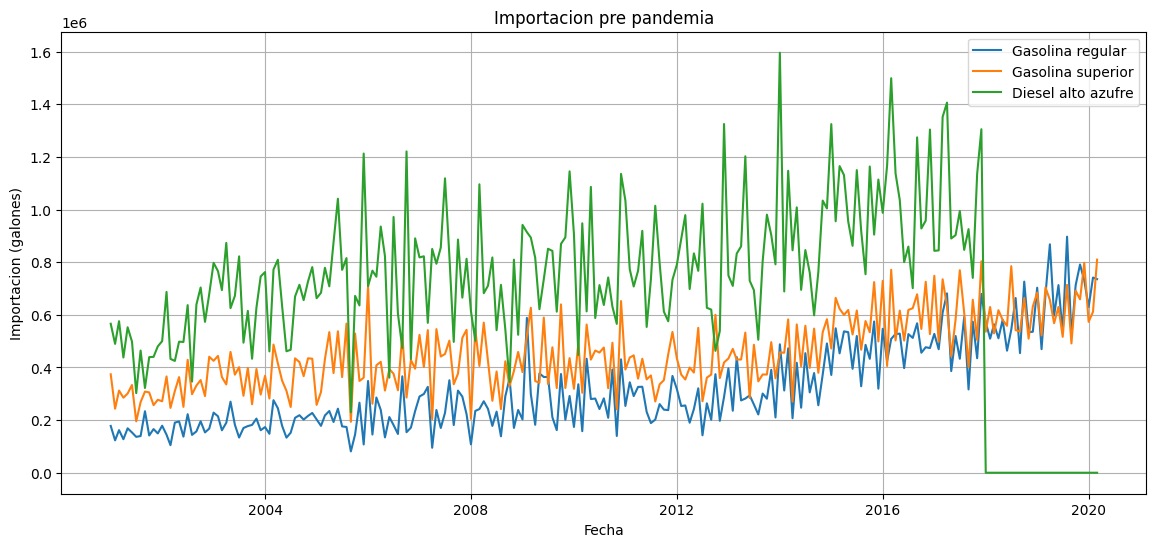

In [38]:
# Comportamiento pre pandemia
postYears = importacion[importacion['Fecha'] <= '2020-03-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Importacion pre pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importacion (galones)')
plt.legend()
plt.grid(True)
plt.show()

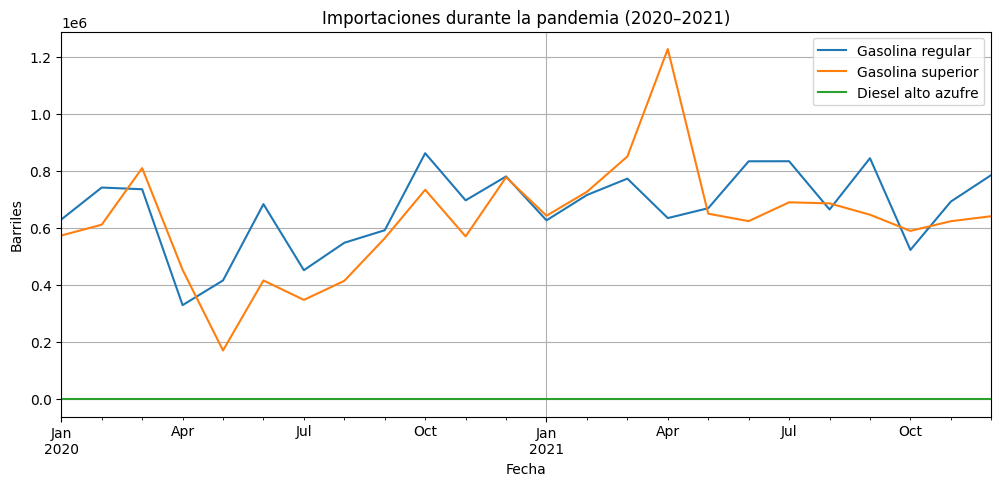

In [31]:
# Comportamiento en pandemia
mask_pandemia = (importacion['Fecha'] >= '2020-01-01') & (importacion['Fecha'] <= '2021-12-31')
imp_pandemia = importacion[mask_pandemia]

imp_pandemia.set_index('Fecha')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].plot(figsize=(12,5))
plt.title("Importaciones durante la pandemia (2020–2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.show()


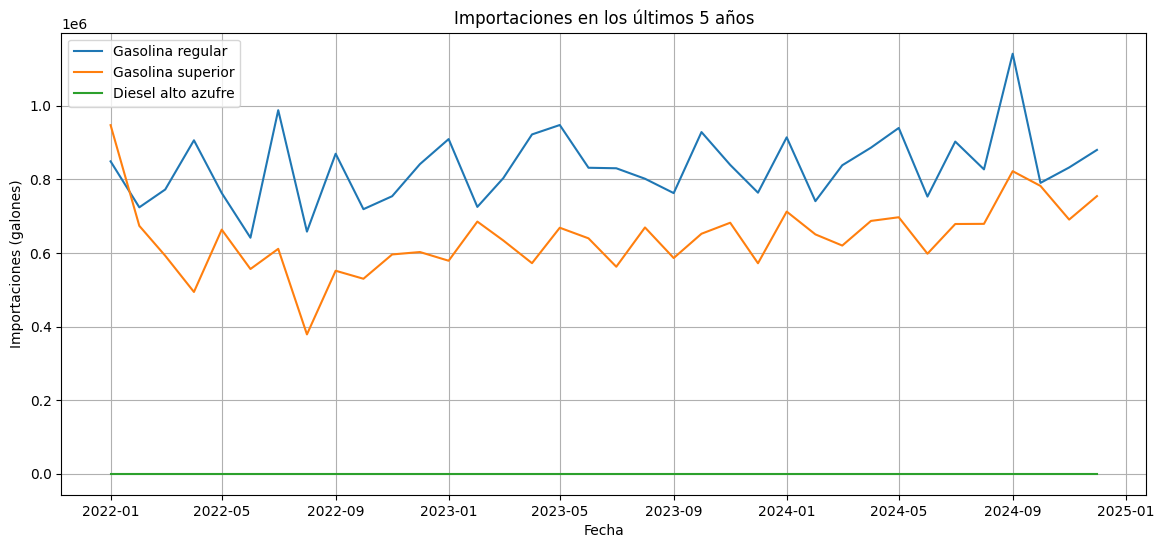

In [ ]:
# Comportamiento post pandemia
postYears = importacion[importacion['Fecha'] >= '2022-01-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Importaciones post pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importaciones (galones)')
plt.legend()
plt.grid(True)
plt.show()


__CONSUMO__

Este conjunto representa el consumo mensual interno de diferentes productos petroleros en Guatemala. La unidad en la que se mide cada variable es en barriles*. Los registros en este conjunto van del 2000 al 2024.Para este análisis solo se tomaran en cuenta las columans de gasolina regular, gasolina super y diese de alto azufre.

*Un barril equivale a 42 galones.

In [ ]:
consumo = pd.read_csv("./data/CSV/consumo.csv")

print("Resumen Consumo:")
print(consumo.describe())

Resumen Consumo:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min       160741.900000      300242.781667        0.000000e+00
25%       215650.312917      383931.904375        0.000000e+00
50%       288193.130000      423319.540000        6.721700e+05
75%       548073.682500      573704.195000        7.791021e+05
max       938086.570000      786598.120000        1.149175e+06


<Figure size 1000x500 with 0 Axes>

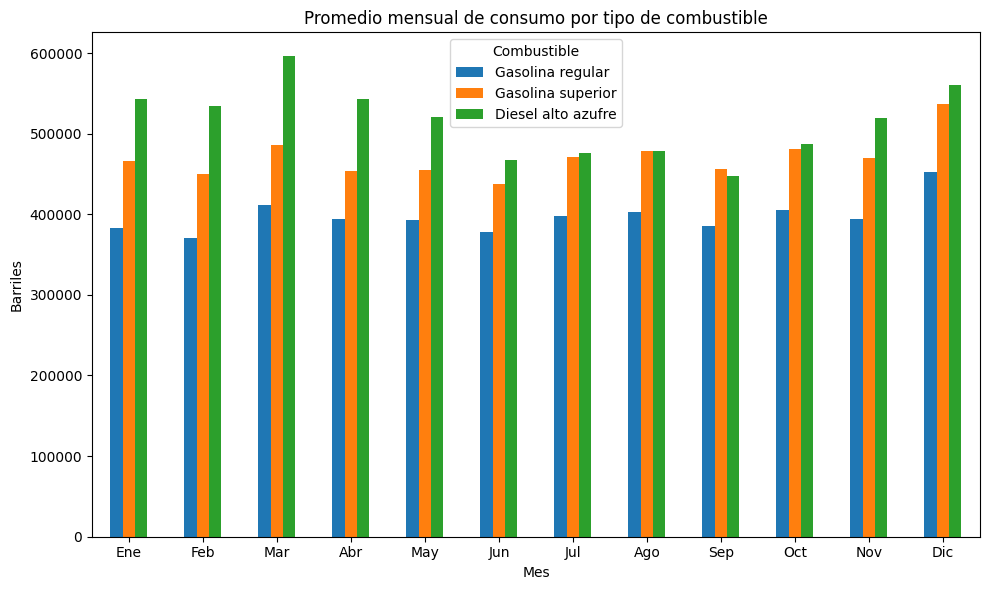

In [39]:
#meses con más consumo
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'])
consumo['Mes'] = consumo['Fecha'].dt.month
prom_mensual_con = consumo.groupby('Mes')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

plt.figure(figsize=(10,5))
prom_mensual_con.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual de consumo por tipo de combustible')
plt.xlabel('Mes')
plt.ylabel('Barriles')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title="Combustible")
plt.tight_layout()
plt.show()

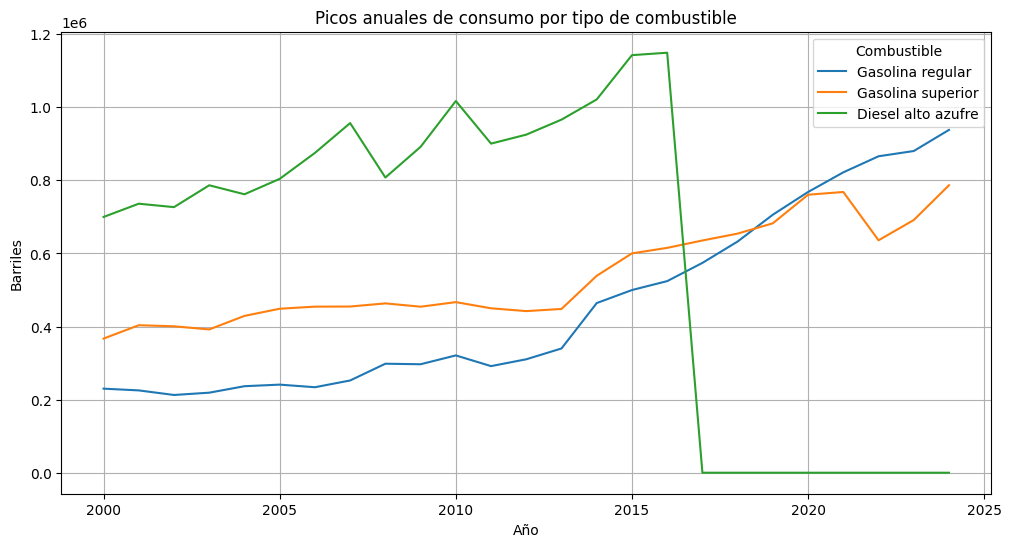

In [40]:
#picos anuales por tipo de combustible
consumo['Año'] = consumo['Fecha'].dt.year
picos_con = consumo.groupby('Año')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].max()

picos_con.plot(figsize=(12,6))
plt.title('Picos anuales de consumo por tipo de combustible')
plt.ylabel('Barriles')
plt.xlabel('Año')
plt.grid(True)
plt.legend(title="Combustible")
plt.show()

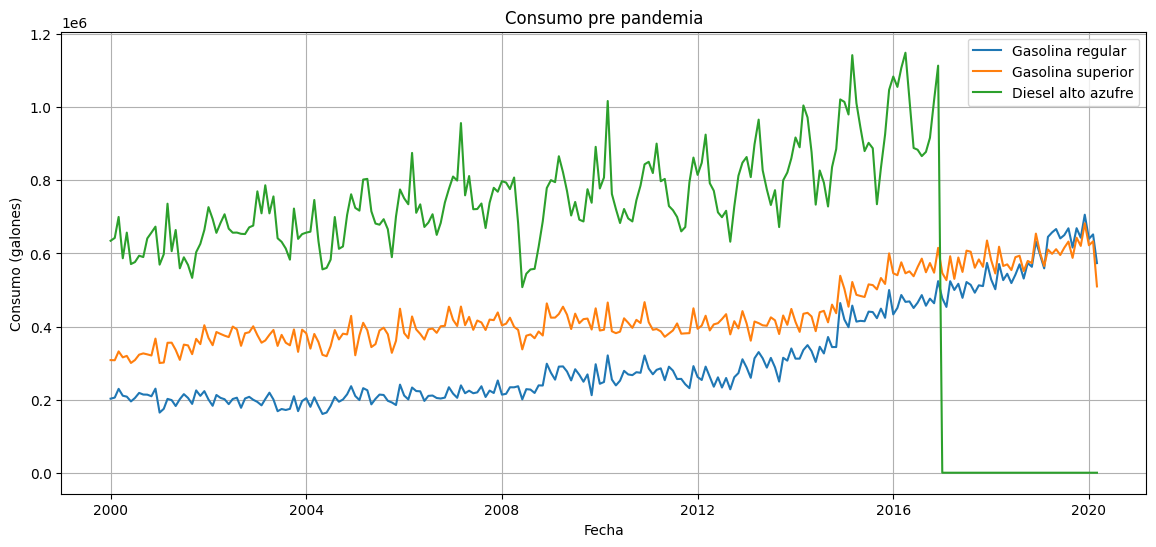

In [37]:
# Comportamiento pre pandemia
postYears = consumo[consumo['Fecha'] <= '2020-03-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Consumo pre pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (galones)')
plt.legend()
plt.grid(True)
plt.show()

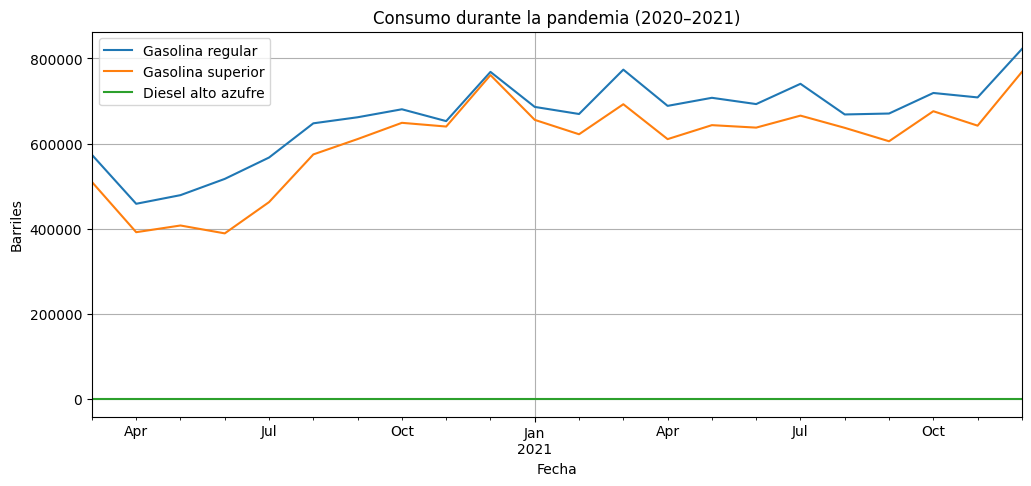

In [35]:
# Comportamiento en pandemia
mask_pandemia_con = (consumo['Fecha'] >= '2020-03-01') & (consumo['Fecha'] <= '2021-12-31')
con_pandemia = consumo[mask_pandemia_con]

con_pandemia.set_index('Fecha')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].plot(figsize=(12,5))
plt.title("Consumo durante la pandemia (2020–2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.show()

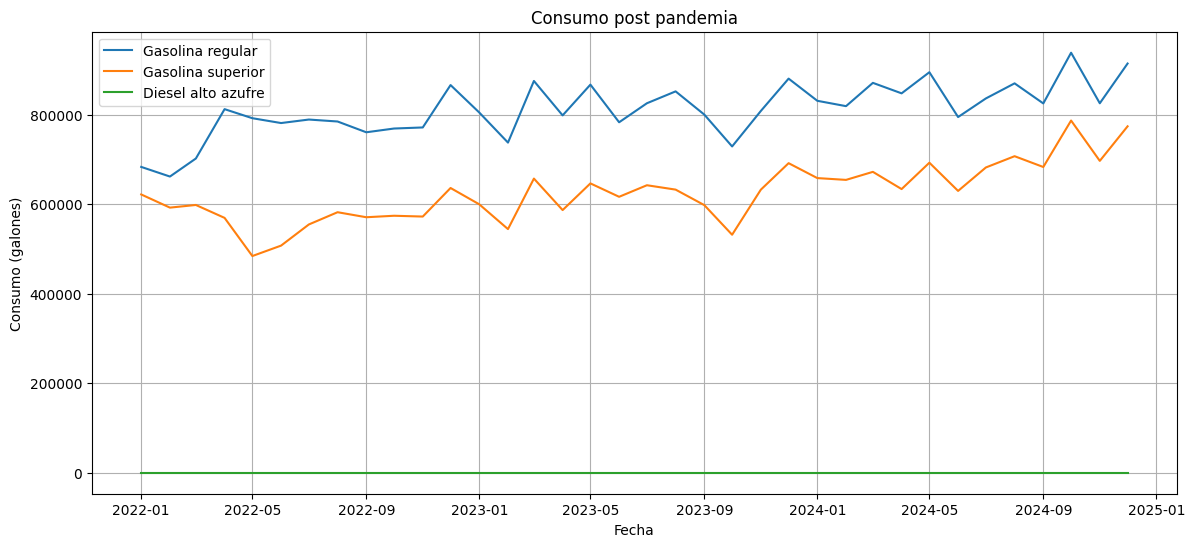

In [36]:
# Comportamiento post pandemia
postYears = consumo[consumo['Fecha'] >= '2022-01-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Consumo post pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (galones)')
plt.legend()
plt.grid(True)
plt.show()

### Series Univariantes

##### __Importacion (Gasolina superior, Gasolina regular, Diesel)__

In [14]:
file_path = "./data/CSV/importacion.csv"
df = pd.read_csv(file_path)

In [15]:
df = df[pd.to_datetime(df['Fecha'], errors='coerce').notna()]
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Preprocessing para diesel alto azufre
serie_diesel = df[['Fecha', 'Diesel alto azufre']].copy()
serie_diesel.rename(columns={'Diesel alto azufre': 'Diesel'}, inplace=True)

serie_gasolina_regular = df[['Fecha', 'Gasolina regular']].set_index('Fecha')
serie_gasolina_regular = serie_gasolina_regular.asfreq('MS')  # Frecuencia mensual

serie_gasolina_superior = df[['Fecha', 'Gasolina superior']].set_index('Fecha')
serie_gasolina_superior = serie_gasolina_superior.asfreq('MS')  # Frecuencia mensual

serie_diesel.set_index('Fecha', inplace=True)
serie_diesel = serie_diesel.asfreq('MS')


In [16]:
print("Gasolina Regular: \n")
print("Inicio:", serie_gasolina_regular.index.min())
print("Fin:", serie_gasolina_regular.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_regular.index))

print("\nGasolina Superior: \n")
print("Inicio:", serie_gasolina_superior.index.min())
print("Fin:", serie_gasolina_superior.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_superior.index))

print("\nDiesel: \n")
print("Inicio:", serie_diesel.index.min())
print("Fin:", serie_diesel.index.max())
print("Frecuencia:", pd.infer_freq(serie_diesel.index))

Gasolina Regular: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Gasolina Superior: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Diesel: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS


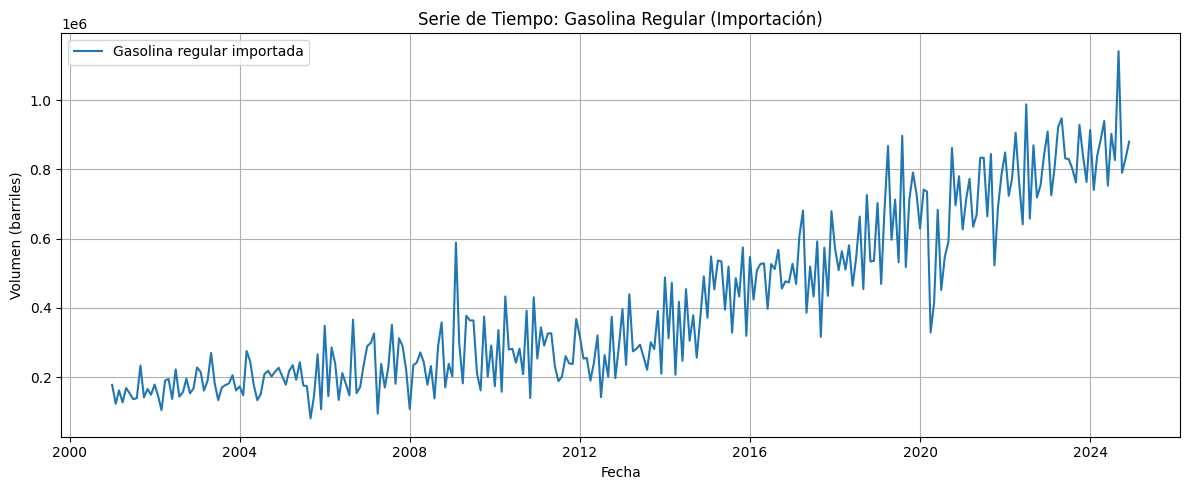

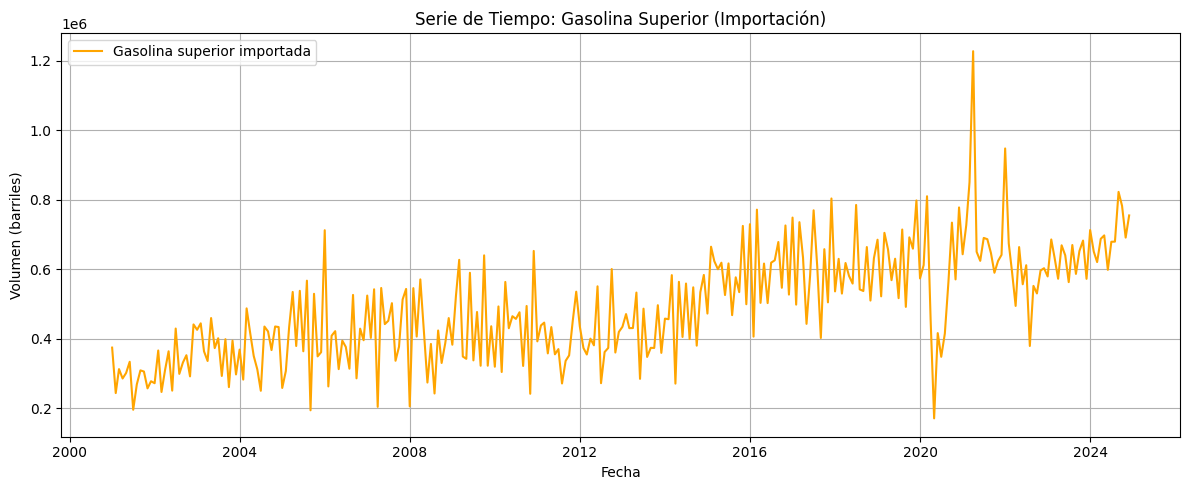

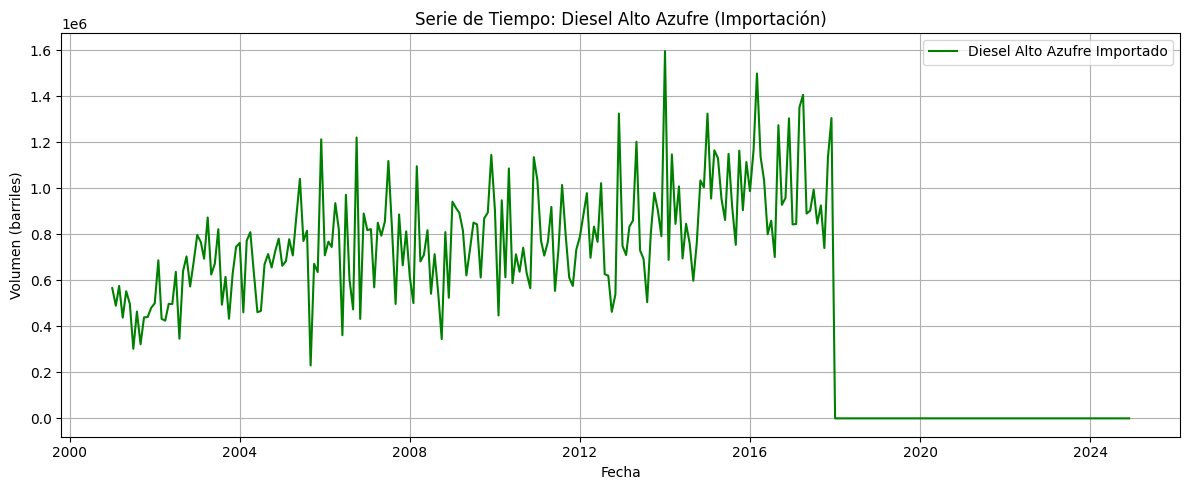

In [17]:
# === Gráfico de la serie Gasolina regular Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_regular, label='Gasolina regular importada')
plt.title('Serie de Tiempo: Gasolina Regular (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Gasolina superior Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_superior, label='Gasolina superior importada', color='orange')
plt.title('Serie de Tiempo: Gasolina Superior (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Diesel ===
plt.figure(figsize=(12, 5))
plt.plot(serie_diesel, label='Diesel Alto Azufre Importado', color='green')
plt.title('Serie de Tiempo: Diesel Alto Azufre (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


-  __Analisis Graficas__

A primera vista se puede ver lo siguiente: 

Para la gasolina regular podemos ver que ha ido en un crecimiento normal, teniendo un pico aproximadamente en el 2009 en importaciones, un bajon a mediados de 2020, en general un crecimiento normal, notando que desde 2012 empezo a tener una pendiente un poco mas inclinada.

Para la gasolina superior, a comparacion de la gasolina regular, esta grafica se ve mas irregular, entre el año 2020 y 2022, se nota mucha variacion llegando a valores muy bajos y muy altos en poco tiempo. Fuera de esos años, un crecimiento bastante lento en comparacion con la gasolina regular.

Para el Diesel de alto azufre, lo que mas sobresale es que en el 2018, todo llego a 0, lo cual es poco probable, entonces nos lleva a pensar que es un error de recopilacion de data. Ademas de eso, podemos notar que a comparacion de los otros tipos de gasolina, que este empieza con un nivel de volumen mas alto. Es bastante mas irregular que las otras, aunque siempre va en crecimiento.

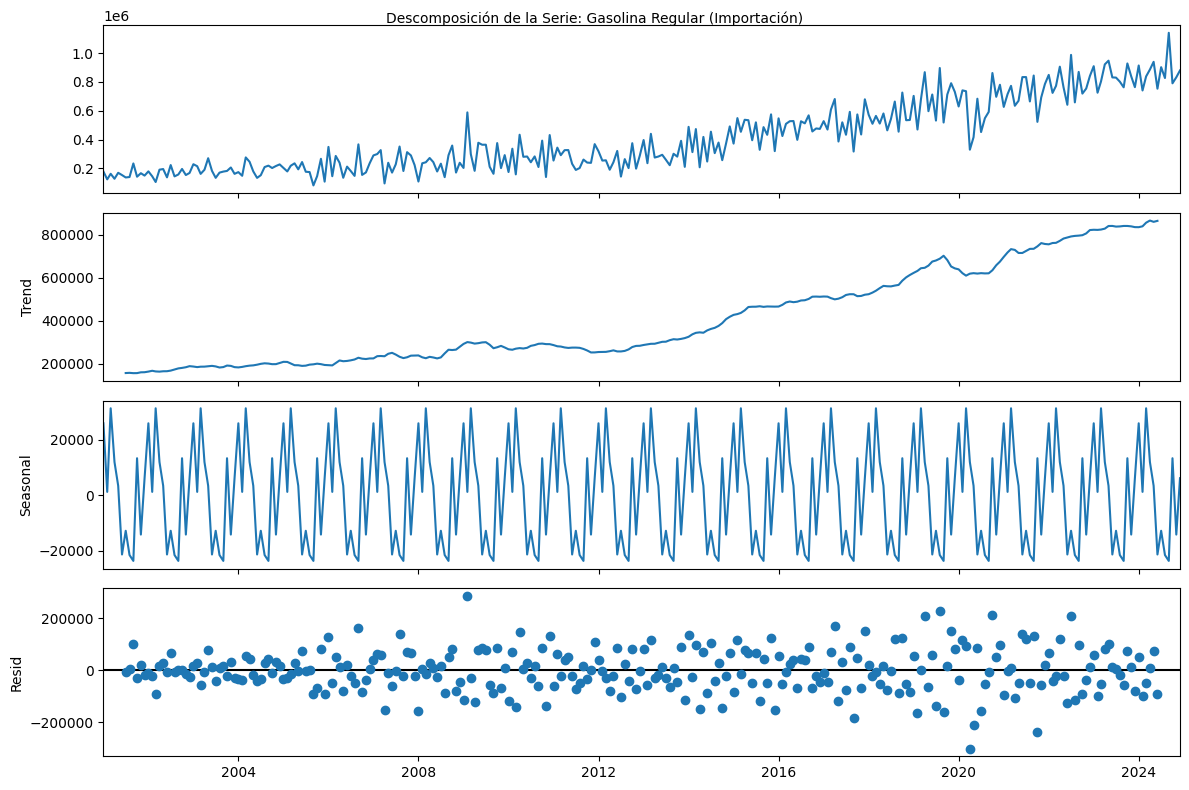

In [18]:
regular_decompose = seasonal_decompose(serie_gasolina_regular, model='additive')

# Gráfica de los componentes
plt.rcParams.update({'figure.figsize': (12, 8)})
regular_decompose.plot()
plt.suptitle("Descomposición de la Serie: Gasolina Regular (Importación)", fontsize=10)
plt.show()

-  __Analisis de los componentes__


    - __Trend:__
La componente de tendencia muestra un crecimiento sostenido en las importaciones de gasolina regular desde el año 2001 hasta alrededor de 2023. Este crecimiento no es lineal, pero sí constante en el largo plazo, con algunos períodos de desaceleración o estabilización, especialmente entre 2014 y 2016, y una caída moderada alrededor del 2020, posiblemente relacionada con la pandemia de COVID-19. El hecho de que la media de la serie se incremente a lo largo del tiempo indica que la serie no es estacionaria en media, ya que la tendencia altera la estabilidad del nivel general de la serie temporal.


    - __Seasonal:__ 
La componente estacional refleja un patrón claro y repetitivo a lo largo de cada año. Específicamente, se observan aumentos y disminuciones regulares con la misma estructura mes a mes, lo que indica una estacionalidad mensual fuerte. Este comportamiento sugiere que las importaciones de gasolina regular siguen un patrón cíclico anual, probablemente vinculado al consumo estacional, vacaciones, actividades económicas o políticas de abastecimiento. La estacionalidad se mantiene bastante constante en amplitud, lo cual es útil para modelar y prever el comportamiento futuro.


    - __Resid:__ 
Los residuos, es decir, la parte no explicada por la tendencia ni la estacionalidad, parecen oscilar alrededor de cero y no muestran una tendencia visible ni cambios significativos en su dispersión a lo largo del tiempo. Esto sugiere que los residuos son ruido aleatorio con varianza aproximadamente constante, lo cual es un buen indicio para modelar. Aunque se observan algunos puntos atípicos (especialmente entre 2020 y 2021), no hay una evidencia clara de que la varianza cambie sistemáticamente, por lo que se puede decir que la serie es aproximadamente estacionaria en varianza.